In [1]:
from mybatch import *
import numpy as np
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqn
from dataset import Dataset, DatasetIndex

# train linear regression

loss:  2.94539


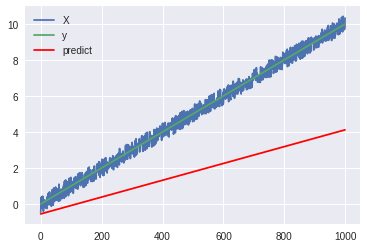

loss:  0.102798


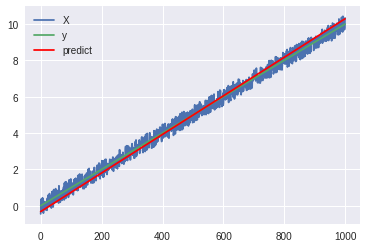

loss:  0.101834


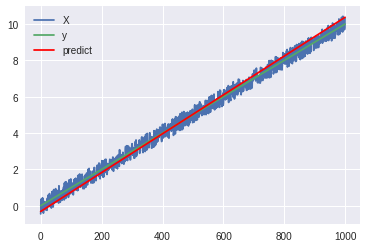

loss:  0.0950922


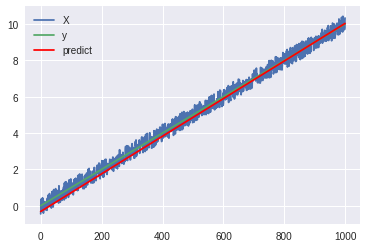

loss:  0.0854219


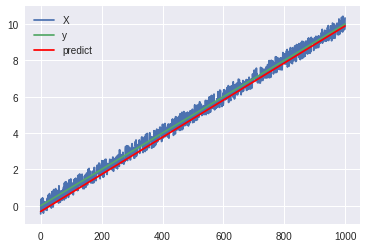

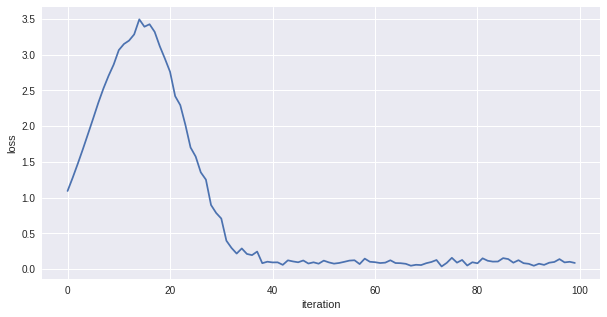

In [2]:
len_data = 1000
ix = DatasetIndex(np.arange(len_data))

dset = Dataset(ix,MyBatch)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
i = 0
x, y = generate(len_data, 'linear')
loss = []
for batch in tqn(dset.gen_batch(10, n_epochs=1)):
   # print(i.indices)
    batch.load([x, y]).generate_batch().train_linear_model(sess)
    i += 1
    loss.append(batch.loss)
    if i == 20:
        print('loss: ', batch.loss)
        i = 0
        plt.plot(x, label='X')
        plt.plot(y, label='y')
        plt.plot(batch.w * y + batch.b, c ='r', label='predict')
        plt.legend()
        plt.show()
plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')

# train logistic regression


test:  [-10   5  -1  -1  -1   5] 
 predict:  [0, 1, 0, 0, 0, 1] 



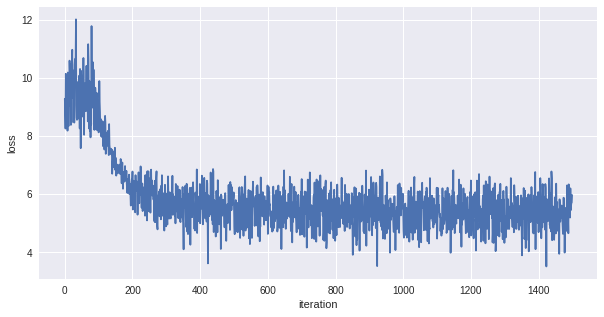

In [3]:
len_data = 5000
ix = DatasetIndex(np.arange(len_data))

dset = Dataset(ix, MyBatch)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
i = 0
test = np.array([-10, 5, -1, -1, -1, 5])
result = np.zeros(len(test), dtype=np.float32)
x, y = generate(len_data, 'logistic')
loss = []
for batch in tqn(dset.gen_batch(10, n_epochs=3)):
    batch.load([x, y]).generate_batch().train_logistic_model(sess, result, test)
    loss.append(batch.loss)

result = [0 if i < 0.5 else 1 for i in result]
print('test: ', test, '\n', 'predict: ', result, '\n')
plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')

# train poisson regression


predict lam: [ 0.56549448  0.54049063  0.64316797]
true lam: [ 0.43748028  0.74170656  0.56475587]


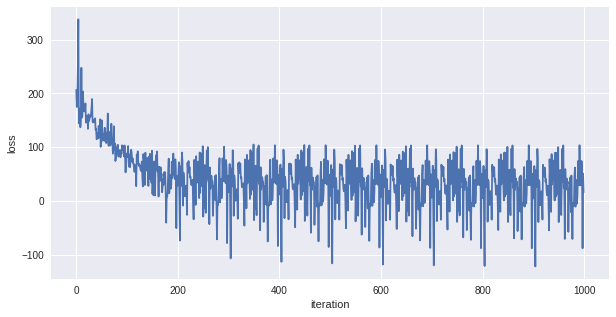

In [4]:
len_data = 1000
ix = DatasetIndex(np.arange(len_data))

dset = Dataset(ix,MyBatch)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
loss = []

test = np.random.random(3).reshape(1, 3)
result = np.zeros(3, dtype=np.float32)
lam = np.random.random(3)
x, y = generate(len_data, 'poisson', lam)
for batch in tqn(dset.gen_batch(batch_size=10, n_epochs=10)):
    batch.load([x, y]).generate_batch().train_poisson_model(sess, result, test)
    loss.append(batch.loss)
    tens_lam = batch.w
print('predict lam: {}\ntrue lam: {}'. format(np.exp(-tens_lam.reshape(-1)), lam))
plt.figure(figsize=(10, 5))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')